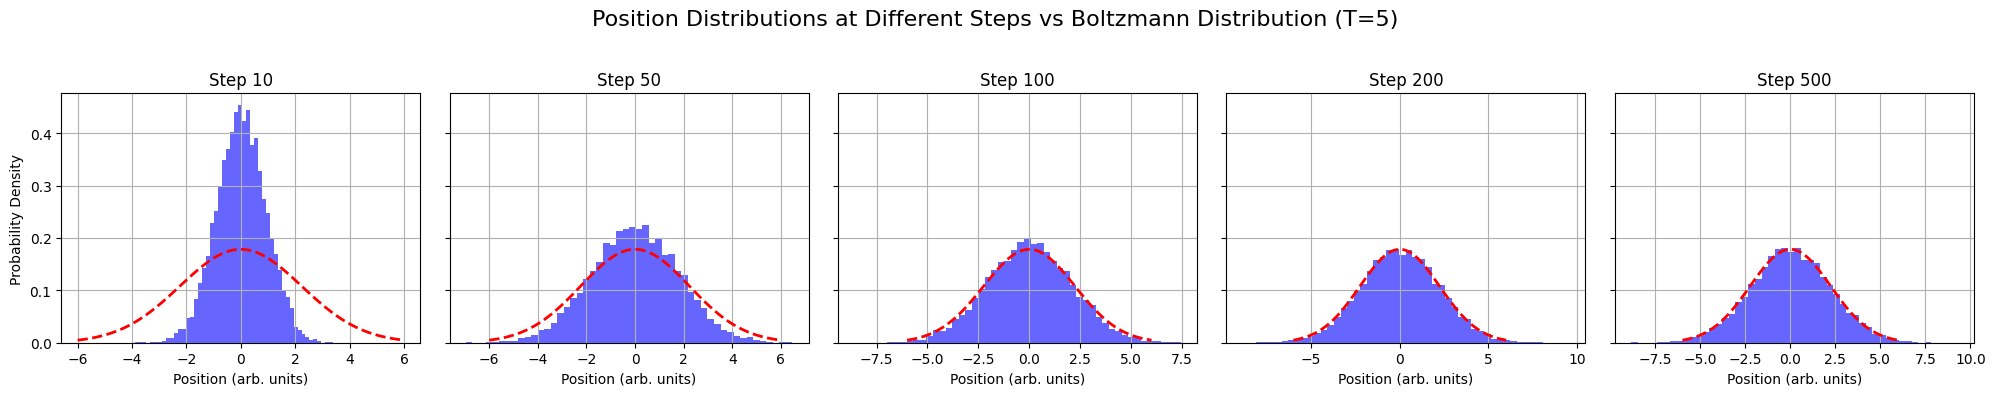

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define constants for the specific case
k = 1       # Spring constant (arbitrary unit)
k_B = 1     # Boltzmann constant (arbitrary unit)
gamma = 1   # Friction coefficient (arbitrary unit)
dt = 0.01   # Time step (arbitrary unit)
n_steps = 500  # Number of simulation steps
T = 5       # Temperature to compare

# Define the Boltzmann distribution (theoretical PDF)
def boltzmann_distribution(x, k, k_B, T):
    normalization_factor = np.sqrt(k / (2 * np.pi * k_B * T))
    return normalization_factor * np.exp(-k * x**2 / (2 * k_B * T))

# Langevin simulation function
def langevin_simulation(T, k, gamma, dt, n_steps):
    x = np.zeros(n_steps)
    for i in range(1, n_steps):
        random_force = np.sqrt(2 * k_B * T * gamma / dt) * np.random.randn()
        x[i] = x[i-1] - (k / gamma) * x[i-1] * dt + random_force * dt
    return x

# Simulate trajectories for T = 5
num_trajectories = 10000  # Number of trajectories to use for distribution comparison
steps_to_plot = [10, 50, 100, 200, 500]  # Steps to compare
positions_at_steps = {step: [] for step in steps_to_plot}  # Dictionary to hold positions at each step

for _ in range(num_trajectories):
    x_sim = langevin_simulation(T, k, gamma, dt, n_steps)
    for step in steps_to_plot:
        positions_at_steps[step].append(x_sim[step - 1])  # Collect position at specified steps (0-indexed)

# Prepare the x values for the theoretical PDF
x_values = np.linspace(-6, 6, 100)  # Range for x values
pdf_theory = boltzmann_distribution(x_values, k, k_B, T)

# Create a panel of 5 figures
fig, axs = plt.subplots(1, 5, figsize=(20, 4), sharey=True)
fig.suptitle('Position Distributions at Different Steps vs Boltzmann Distribution (T=5)', fontsize=16)

for i, step in enumerate(steps_to_plot):
    # Plot histogram of positions at each step (simulated PDF)
    axs[i].hist(positions_at_steps[step], bins=50, density=True, alpha=0.6, color='b', label='Simulated PDF')
    
    # Plot the theoretical Boltzmann distribution
    axs[i].plot(x_values, pdf_theory, 'r--', lw=2, label='Boltzmann Distribution')

    # Titles and labels
    axs[i].set_title(f'Step {step}')
    axs[i].set_xlabel('Position (arb. units)')
    axs[i].grid(True)

# Add y-axis label to the leftmost subplot
axs[0].set_ylabel('Probability Density')

# Display the plot
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout for the main title
plt.show()
